In [11]:
"""
生体医工学可視化（WordCloud + Mecab Neologd）
requirements:
 pip install pandas janome nlpplot matplotlib plotly
"""
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

from pprint import pprint

In [12]:
file_path = "datasets/生体医工学会論文5755件.csv"
df = pd.read_csv(file_path,encoding='utf-8')
df.head()

,No,Title,Author,Journal,Vol,No.1,Pages,Published_Year
0,0,リレー随筆他,NaN,生体医工学,43,4,800-802,2005
1,1,高齢者の使用を考慮した引戸の操作性の計測・評価のための実物大実験装置の開発と評価,"田中 眞二, 前川 陽, 奥野 竜平, 赤澤 堅造",生体医工学,43,4,795-799,2005
2,2,足指マウス開発にむけての基礎的検討―母指の運動特性―,"田中 則子, 上田 知生, 中尾 恵, 佐藤 哲大, 湊 小太郎, 吉田 正樹, 纐纈 和美",生体医工学,43,4,790-794,2005
3,3,血液検査用マイクロ流体デバイスの作製,"寺田 信幸, 山田 博之, 吉田 善一",生体医工学,43,4,785-789,2005
4,4,複数皮質活動の動的イメージングのためのfMRI-MEG統合解析法,"隠浪 康行, 小林 哲生, 鄭 址旭, 大橋 俊平, 濱田 昌司, 長峯 隆, 福山 秀直,...",生体医工学,43,4,777-784,2005


In [13]:
df["Published_Year"].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [14]:
years= df["Published_Year"].unique().tolist()
n_years = len(years) # 19年間
print(n_years)

19


In [15]:
y1, y2 = 2005, 2006
df1 = df[(df['Published_Year']>=y1) & (df['Published_Year']<=y2)]
titles =  df1.loc[:,['Title']].values
pprint(titles[:10])

array([['リレー随筆他'],
       ['高齢者の使用を考慮した引戸の操作性の計測・評価のための実物大実験装置の開発と評価'],
       ['足指マウス開発にむけての基礎的検討―母指の運動特性―'],
       ['血液検査用マイクロ流体デバイスの作製'],
       ['複数皮質活動の動的イメージングのためのfMRI-MEG統合解析法'],
       ['低侵襲心臓外科手術用リアルタイム三次元超音波Integral Videography'],
       ['業務スケジューリングからみた看護業務属性の検討'],
       ['指タップ加速度計側システムの開発とパーキンソン病診断支援への応用'],
       ['パラレルワイヤ駆動システムと繰返し学習制御を用いた生体部位の他動的軌道追従の実験的検証'],
       ['LAMP法と導電性中空糸膜を利用したウイルス検査法におけるウシ血清個体差の影響']], dtype=object)


In [70]:
import word_wakati as wkt

targets = ['名詞', '形容詞'] #評価対象にする品詞
ignores = ['－', '～', '-', '(', ')', '---', '.','ため','特集','的','用いる','有する','随筆','リレー'] #無視する記号や単語
ignores += ['研究','開発','検討','試作','提案','紹介','展望','事例','課題',"および", "評価"]
mecab = wkt.create_parser(worker='mecab', parts_of_speech=targets, stop_words=ignores)

In [71]:
texts =[]
for t in titles:
    if t[0].isascii():
        continue 
        
    texts += [" ".join(wkt.word_seq(t[0], parser=mecab))]
df2 = None
df2 = pd.DataFrame({'text': texts})

In [72]:
df2.head()

,text
0,肝臓 血管 変動 追従 2D -3 D 超音波 画像 レジストレーション 手法
1,経穴 吸光 特性 基礎研究
2,神経 磁場 計測 システム ラット 脊髄 神経 活動 可視化
3,スピンロック シーケンス MRI 脳神経 磁場 計測 雑音 磁場 影響
4,光ポンピング 磁気センサ ポンプ 光 方向 操作 磁場 方向 推定


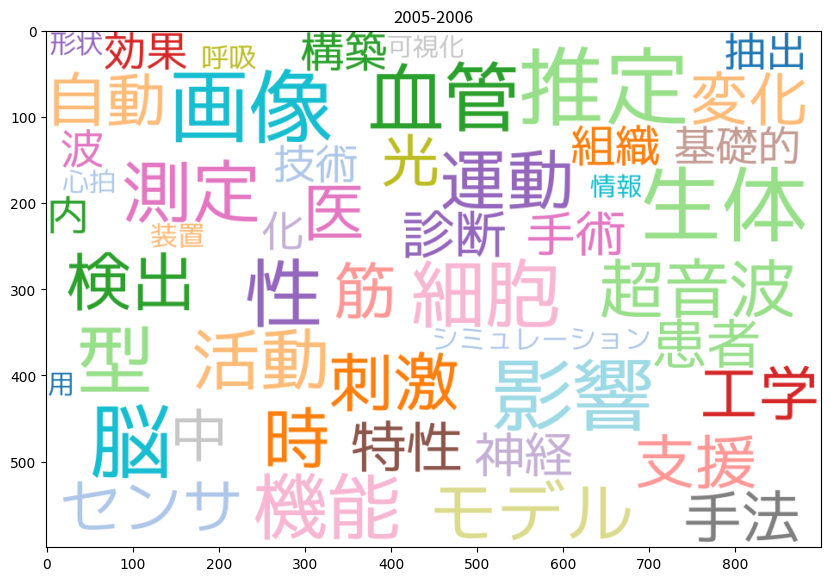

In [73]:
npt = nlplot.NLPlot(df2, target_col='text')
# Stopword calculations can be performed.
stopwords = npt.get_stopword(top_n=4, min_freq=0)

fig = plt.figure(figsize=(10, 18))
fig.tight_layout()
fig_wc = npt.wordcloud(
    width = 900,
    height = 600,
    max_words = 50,
    max_font_size = 100,
    colormap = 'tab20_r',
    stopwords =stopwords,
    mask_file = None,
    save=False
)
title = f'{y1}-{y2}'
# plt.title(title,fontname="MS Gothic")
plt.title(title,fontname="Noto Sans CJK JP")

# plt.axis('off')        
plt.imshow(fig_wc, interpolation="bilinear")      
plt.show()


100%|██████████| 1376/1376 [00:00<00:00, 143512.68it/s]


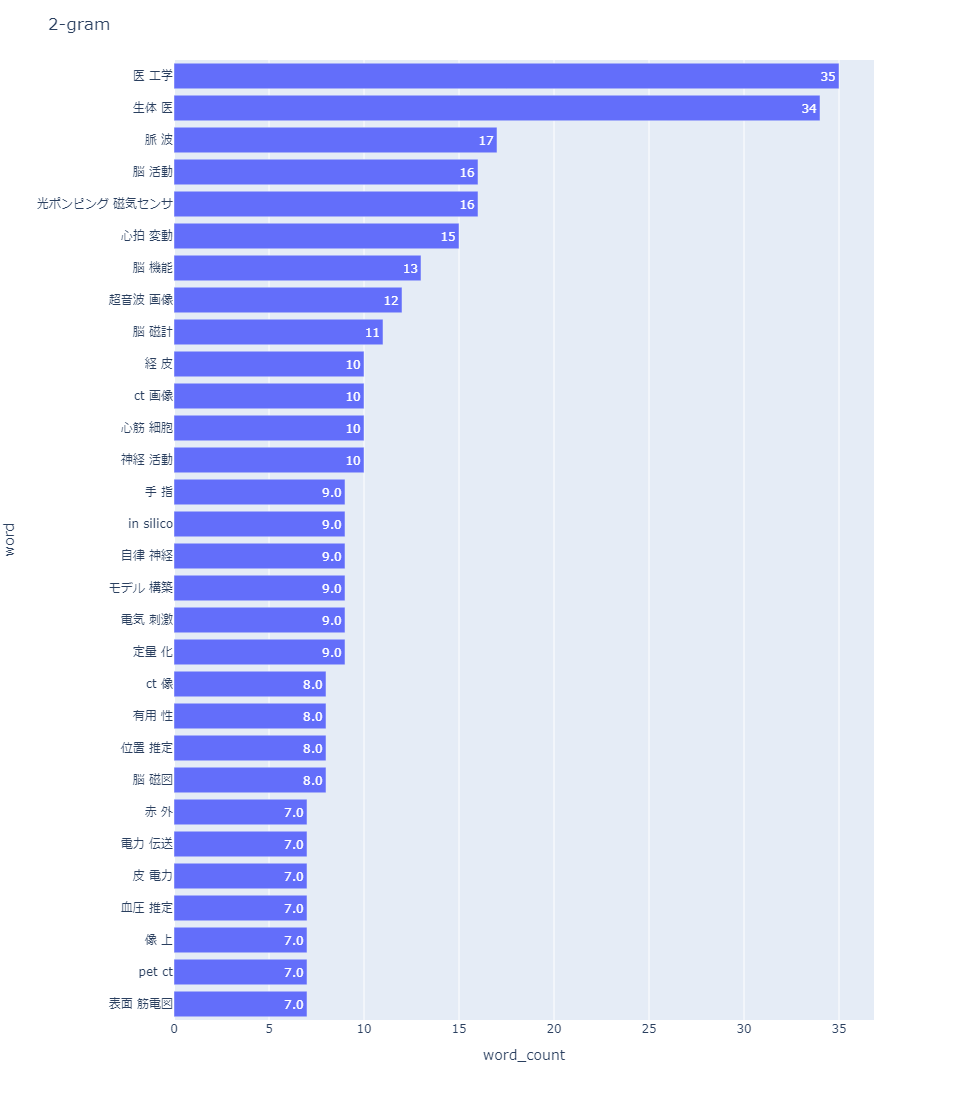

In [74]:
npt.bar_ngram(
    title='2-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=30,
    stopwords=stopwords,
)

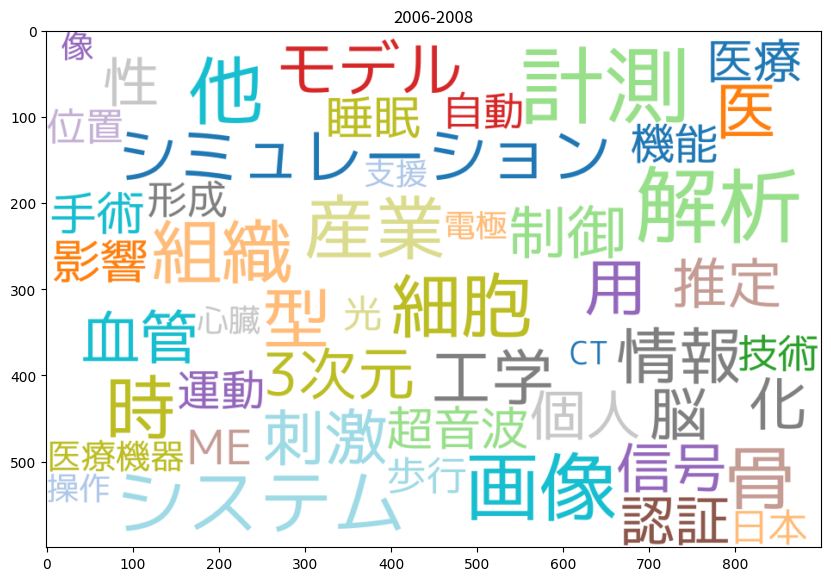

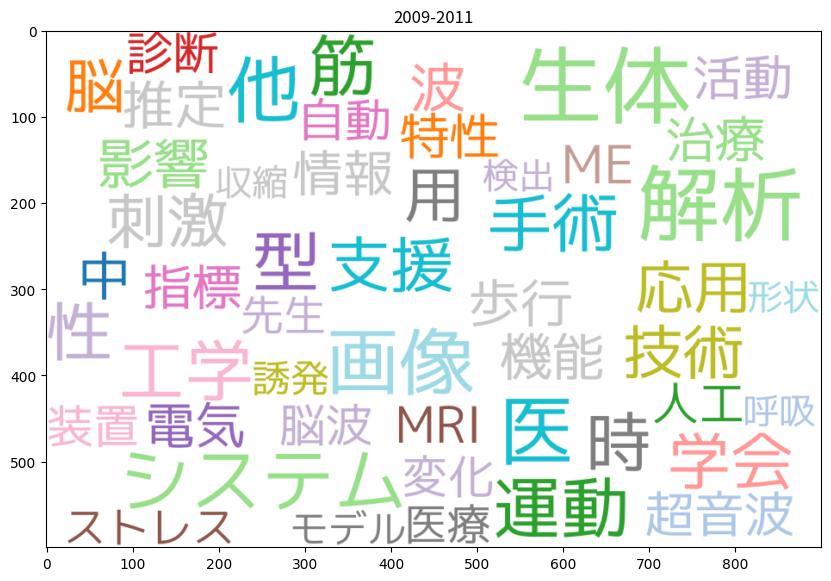

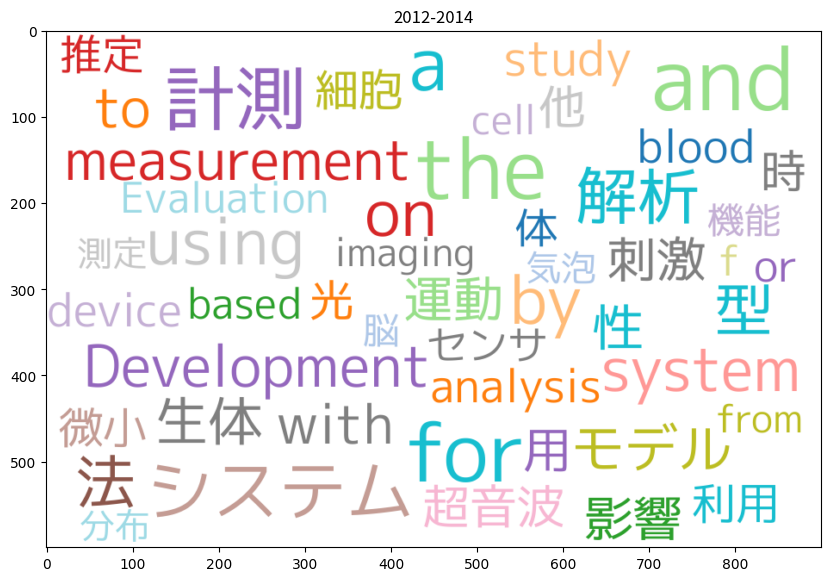

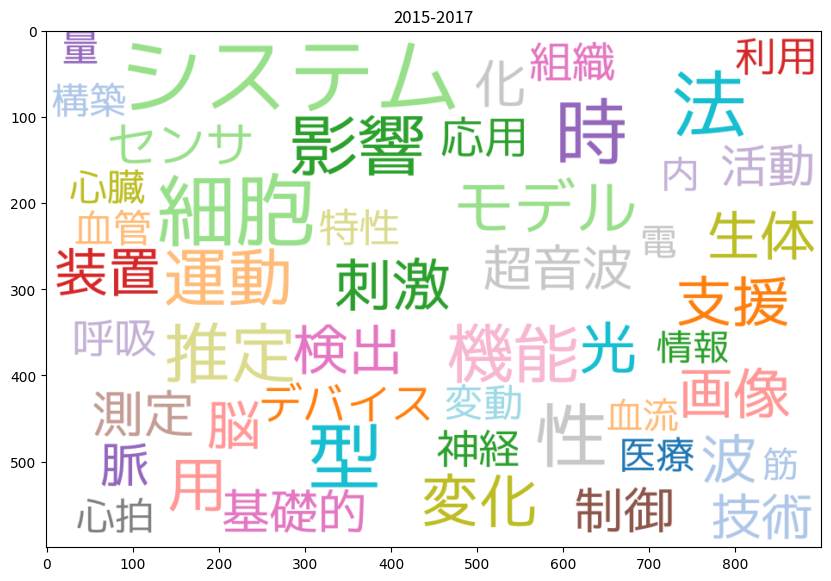

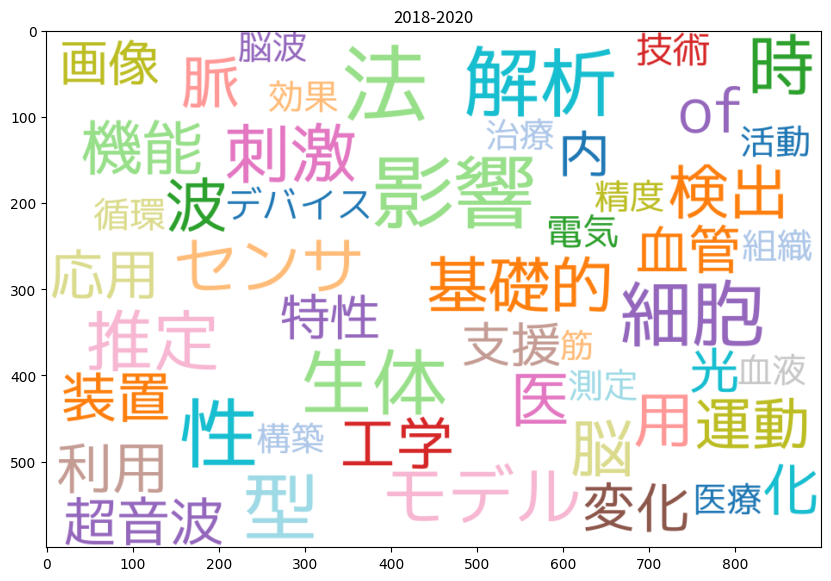

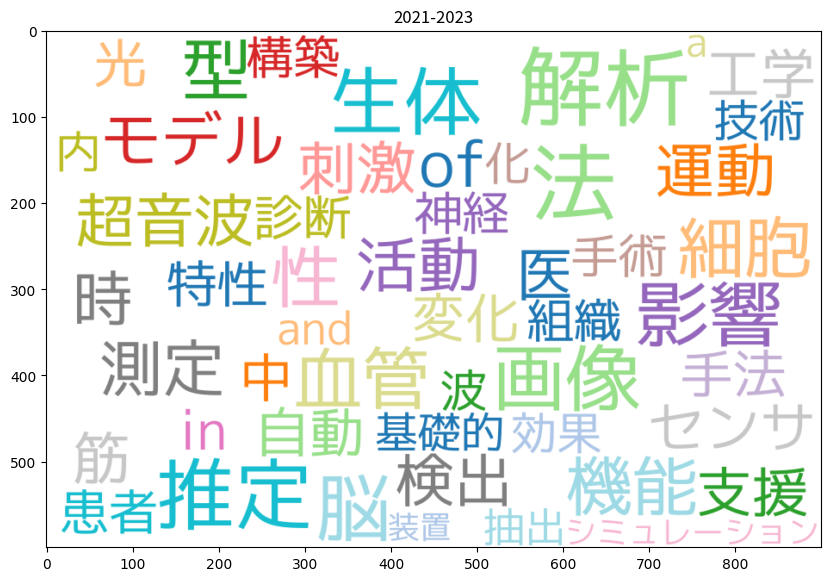

In [75]:
delta = 3  
n_div = n_years / delta
m_div = n_years % delta

for y in range(m_div, n_years, delta):
    fig = plt.figure(figsize=(10, 18))
    fig.tight_layout()
    z = y + delta
    z = z - 1 if z - 1 < n_years else n_years-1     

    df1 = df[(df['Published_Year']>=years[y]) & (df['Published_Year']<=years[z])]
    titles =  df1.loc[:,['Title']].values
    texts =[]
    for t in titles:
        texts += [" ".join(wkt.word_seq(t[0], parser=mecab))]
    df2 = None
    df2 = pd.DataFrame({'text': texts})

    npt = nlplot.NLPlot(df2, target_col='text')
    # Stopword calculations can be performed.
    stopwords = npt.get_stopword(top_n=2, min_freq=0)

    fig_wc = npt.wordcloud(
        width = 900,
        height = 600,
        max_words = 50,
        max_font_size = 100,
        colormap = 'tab20_r',
        stopwords =stopwords,
        mask_file = None,
        save=False
    )
    title = f'{years[y]}-{years[z]}'
    # plt.title(title,fontname="MS Gothic")
    plt.title(title,fontname="Noto Sans CJK JP")

    # plt.axis('off')        
    plt.imshow(fig_wc, interpolation="bilinear")      
    plt.show()       
